# 2D PCA  for title clusters

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# local
import set_path
import supp.support_load as lp
import supp.support_get_mapping as gm

In [3]:
folder = r'data/'
file_name = 'person_title_cluster_pivot.csv'

In [4]:
folder_save = 'img/plots_PCA_of_titles_hack/'
# Check if 'img' directory exists, if not, create it
if not os.path.exists(folder_save.split('/')[0]):
    os.makedirs(folder_save.split('/')[0])
# Check if 'plots' directory exists within 'img', if not, create it
if not os.path.exists(folder_save[:-1]):
    os.makedirs(folder_save[:-1])

In [5]:
data0 = lp.read_csv(file_name, folder=folder, index_col='ID_person')
data0.head()

,administration,epithet,family,priest,privy,rank,worker
ID_person,,,,,,,
1,7,3,0,4,4,4,1
2,1,1,1,1,1,2,0
4,0,2,0,4,4,1,2
5,0,2,0,3,3,1,1
6,0,4,1,1,0,2,0


In [6]:
data0.describe()

,administration,epithet,family,priest,privy,rank,worker
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,0.528370,0.411888,0.316722,0.564395,0.160612,0.475233,0.121585
std,1.292397,0.857556,0.465268,0.783642,0.562884,0.692453,0.346479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,13.000000,6.000000,1.000000,8.000000,6.000000,5.000000,3.000000


In [7]:
scale = 4
scale_cluster = 'privy'
data = data0.copy()
data[scale_cluster] = data[scale_cluster]*scale
data.describe()

,administration,epithet,family,priest,privy,rank,worker
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,0.528370,0.411888,0.316722,0.564395,0.642450,0.475233,0.121585
std,1.292397,0.857556,0.465268,0.783642,2.251537,0.692453,0.346479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,13.000000,6.000000,1.000000,8.000000,24.000000,5.000000,3.000000


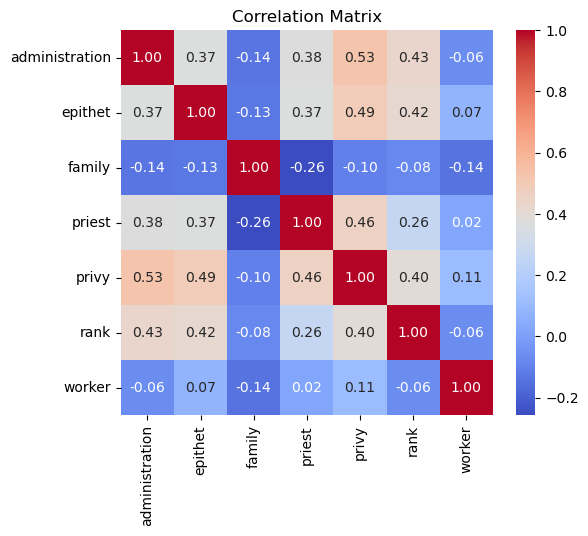

In [8]:
# Assuming your DataFrame is named df
correlation_matrix = data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

PCA

In [9]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)
# Fit PCA to your data
pca.fit(data)
# Transform the data into the new 2-dimensional space
X_2d = pca.transform(data)
 # Convert the transformed data into a DataFrame
X_2d = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])

In [10]:
# Plot the 2D scatterplot
def scatter(cluster, figsize=(6, 5), size_scat = None, size_leg=8):
    # sort array
    cluster_data = np.array(data[cluster])
    idx_sorted = cluster_data.argsort()
    cluster_data = cluster_data[idx_sorted]
    X = X_2d.iloc[idx_sorted, :]
    if cluster == scale_cluster:
        cluster_data = (cluster_data/scale).astype(int)
    n_max = np.max(cluster_data) + 1
    # colors
    tab20c = np.array(plt.get_cmap('tab20c').colors)
    palette = tab20c
    if n_max <= 5:
        palette = palette[::4]
    elif n_max <=10:
        palette = [c for id, c in enumerate(palette) if id % 4 == 1 or id % 4 == 0]
        palette = np.array(palette)
    colors = palette[cluster_data]
    # plots
    plt.figure(figsize=figsize)
    if size_scat is not None:
        plt.scatter(X['PC1'], X['PC2'], c=colors, alpha=.99, s=size_scat)
    else:
        plt.scatter(X['PC1'], X['PC2'], c=colors, alpha=.99)
    #plt.title(f'2D PCA of title clusters\nColored by {cluster}')
    plt.title(f'2D PCA, colored by {cluster}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    # Create custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=palette[i],
                          markersize=size_leg, label=str(i)) for i in range(0, n_max)]
    plt.legend(handles=handles, title=f'n. of {cluster}', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(folder_save + f'PCA_title_{cluster}_hack_{scale_cluster}_scale_{scale}.png',  dpi=600)
    plt.savefig(folder_save + f'PCA_title_{cluster}_hack_{scale_cluster}_scale_{scale}.pdf')
    plt.show()

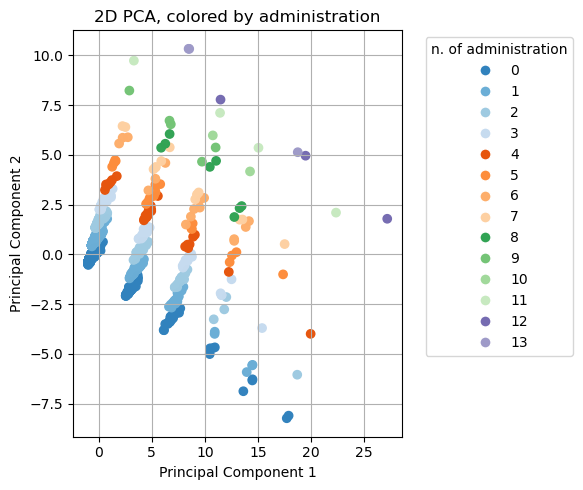

In [11]:
# Plot the 2D scatterplot
cluster = 'administration'
scatter(cluster)

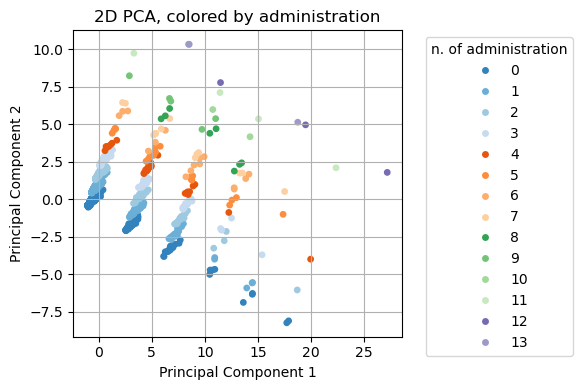

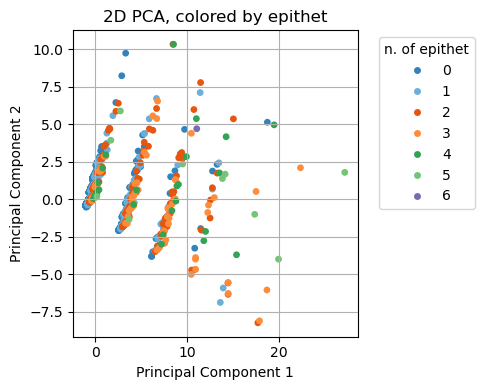

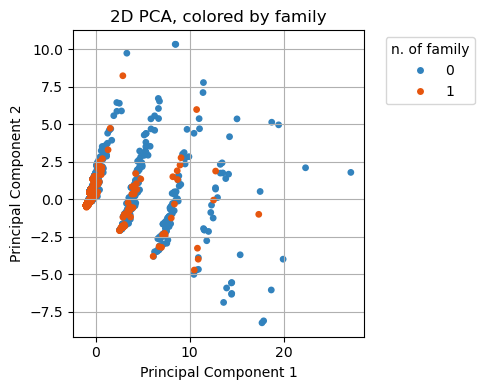

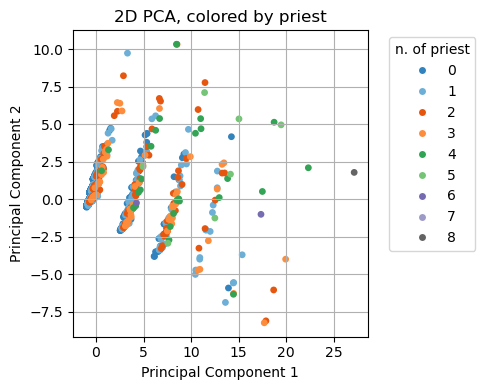

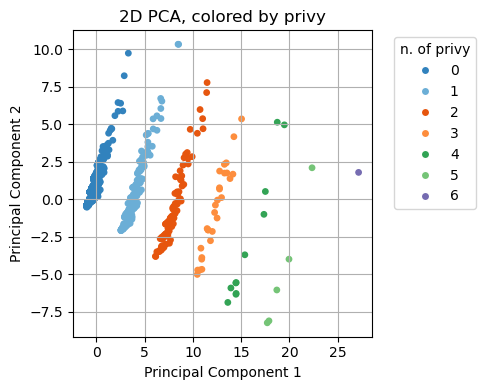

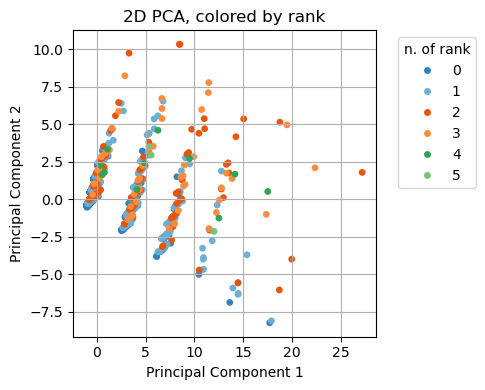

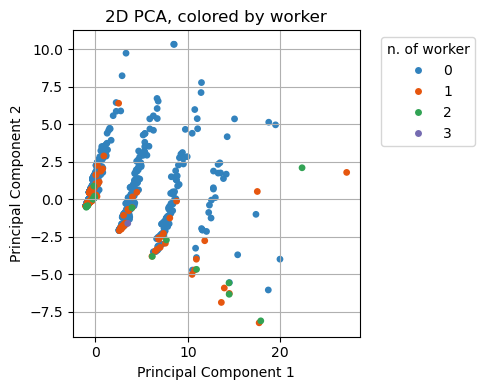

Finished.


In [12]:
for id, cluster in enumerate(data.columns):
    figsize= (6, 4) if cluster=='administration' else (5, 4)
    scatter(cluster, figsize=figsize, size_scat = 15, size_leg=6)

print('Finished.')

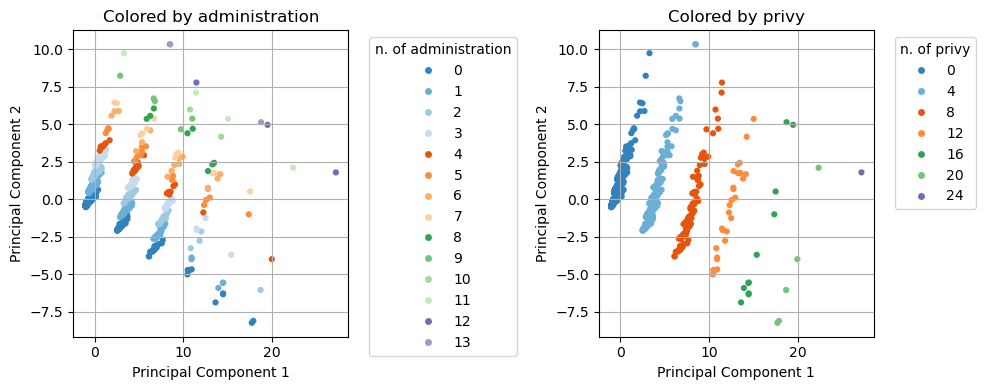

Finished.


In [13]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for limit, cluster in enumerate(['administration', 'privy']):
    # sort array
    cluster_data = np.array(data[cluster])
    idx_sorted = cluster_data.argsort()
    cluster_data = cluster_data[idx_sorted]
    X = X_2d.iloc[idx_sorted, :]
    if cluster == scale_cluster:
        cluster_data = (cluster_data/scale).astype(int)
    n_max = np.max(cluster_data) + 1
    # colors
    tab20c = np.array(plt.get_cmap('tab20c').colors)
    palette = tab20c
    if n_max <= 5:
        palette = palette[::4]
    elif n_max <=10:
        palette = [c for id, c in enumerate(palette) if id % 4 == 1 or id % 4 == 0]
        palette = np.array(palette)
    colors = palette[cluster_data]
    # plots
    axs[limit].scatter(X['PC1'], X['PC2'], c=colors, s=12)
    #plt.title(f'2D PCA of title clusters\nColored by {cluster}')
    axs[limit].set_title(f'Colored by {cluster}')
    axs[limit].set_xlabel('Principal Component 1')
    axs[limit].set_ylabel('Principal Component 2')
    axs[limit].grid()
    # Create custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=palette[i],
                          markersize=6,
                          label=str(i*scale if cluster==scale_cluster else i))
                           for i in range(0, n_max)]
    axs[limit].legend(handles=handles, title=f'n. of {cluster}', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.suptitle(f'2D PCA of title cluster, {scale_cluster} scaled by {scale}')
plt.tight_layout()
plt.savefig(folder_save + f'PCA_title_administration+privy_hack_{scale_cluster}_scale_{scale}.png',  dpi=600)
plt.savefig(folder_save + f'PCA_title_administration+privy_hack_{scale_cluster}_scale_{scale}.pdf')
plt.show()

print('Finished.')

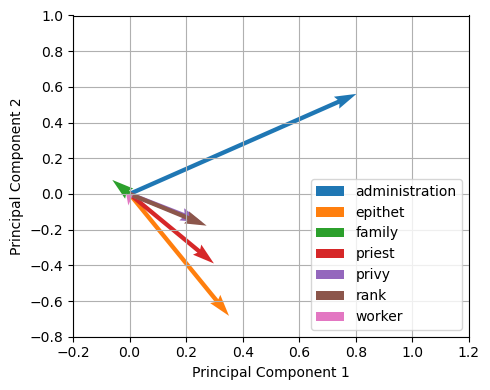

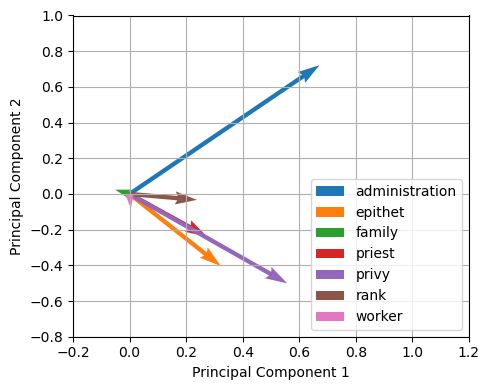

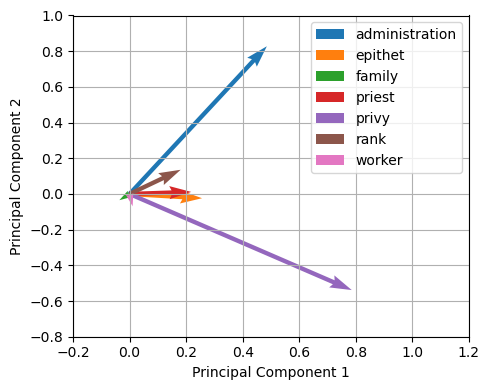

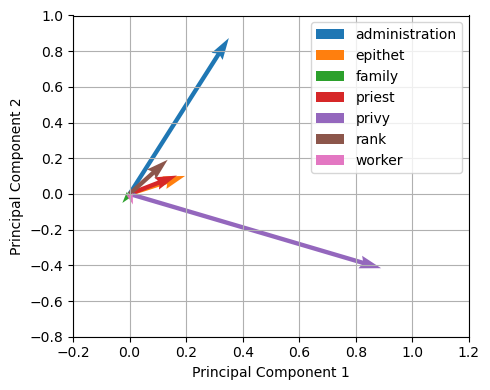

In [21]:
eigenvectors = []
for scale in range(1, 5):
    data2 = data0.copy()
    data2['privy'] = data2['privy']*scale

    # Initialize PCA with 2 components
    pca_hack = PCA(n_components=2)
    # Fit PCA to your data
    pca_hack.fit(data2)

    # Plot arrows representing original features in PCA space
    plt.figure(figsize=(5, 4))
    # Setting font sizes globally
    #plt.rcParams.update({'font.size': 12})  # Set the font size globally
    
    # Scaling factor for the arrows (to make them visible)
    arrow_size = 1
    colors = plt.cm.tab10.colors
    
    size = {
        'administration': 1.1,
        'epithet': 1.1,
        'family': 1.4,
        'priest': 1.22,
        'privy': 1.35, 
        'rank': 1.6,
        'worker': 1.8
    }

    # Plot arrows and feature names
    for i, v in enumerate(pca_hack.components_.T):
        cluster = data.columns[i]
        plt.quiver(0, 0, v[0] * arrow_size, v[1] * arrow_size, angles='xy', scale_units='xy', scale=1, color=colors[i],
                   alpha=1, label=cluster, width=0.011 )
        #plt.arrow(0, 0, v[0] * arrow_size, v[1] * arrow_size, color=colors[i], alpha=0.5)
        #plt.text(v[0] * arrow_size * size[cluster], v[1] * arrow_size * size[cluster], data.columns[i], color='black', ha='center', va='center')
    # Set the limits for x and y axes
    plt.xlim(-.2, 1.2)
    plt.ylim(-.8, 1)
    # Create custom legend
    if scale <= 2:
        plt.legend(loc='lower right')
    else:
        plt.legend()
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    #plt.title('Projection of Feature Vectors')
    plt.grid()
    
    plt.tight_layout()
    plt.savefig(folder_save + f'PCA_title_feature_projection_scale{scale}.png', dpi=600)
    plt.savefig(folder_save + f'PCA_title_feature_projection_scale{scale}.pdf')
    plt.show()

    eigenvectors.append(pca_hack.components_)

In [22]:
first_component = [vectors[0] for vectors in eigenvectors]
second_component = [vectors[1] for vectors in eigenvectors]

In [23]:
pd.DataFrame(first_component)

,0,1,2,3,4,5,6
0,0.802349,0.351622,-0.061138,0.298308,0.256248,0.272375,-0.004598
1,0.671479,0.322672,-0.050979,0.273765,0.557343,0.238331,0.004415
2,0.485341,0.256313,-0.036154,0.217907,0.785622,0.180666,0.010760
3,0.350978,0.196390,-0.025553,0.167347,0.889560,0.134651,0.011813


In [24]:
pd.DataFrame(second_component)

,0,1,2,3,4,5,6
0,0.560785,-0.683149,0.078619,-0.389628,-0.158464,-0.177658,-0.064532
1,0.721459,-0.404195,0.023859,-0.238768,-0.500945,-0.033084,-0.080649
2,0.827608,-0.023873,-0.034772,0.011491,-0.538523,0.135625,-0.068945
3,0.873729,0.100986,-0.050412,0.103083,-0.416065,0.191455,-0.058881
